In [20]:
from pythonpic.classes.species import Species
from pythonpic.classes.grid import Grid
from pythonpic.algorithms import density_profiles

import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
%matplotlib inline

In [2]:
def FDENS(x, moat_left, ramp_length, plasma_length, N):
    rectangle_area = (plasma_length - ramp_length)
    triangle_area = 0.5 * ramp_length
    normalization = N / (rectangle_area + triangle_area)
    result = np.zeros_like(x)
    region1 = x < moat_left
    region2 = (x < moat_left + ramp_length) & ~region1
    region3 = (x < moat_left + plasma_length) & ~(region2 | region1)
    result[region2] = normalization * (x[region2] - moat_left) / ramp_length
    result[region3] = normalization
    return result

In [3]:
g = Grid(100, 100)
moat_left = g.L/4
ramp_length = g.L/4
plasma_length = g.L/2
N = 1000
dense_x = np.linspace(0, g.L, N*1000)
y = FDENS(dense_x, moat_left, ramp_length, plasma_length, N)

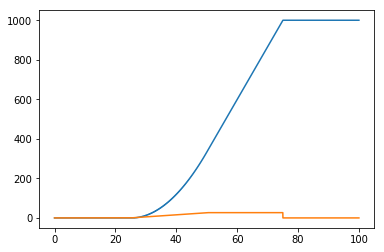

In [4]:
integrated = scipy.integrate.cumtrapz(y, dense_x).astype(int)
plt.plot(dense_x[1:], integrated)
plt.plot(dense_x, y)

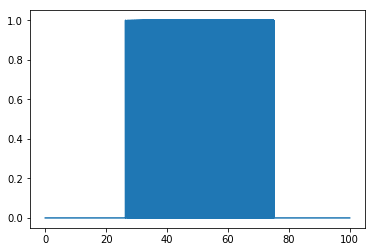

In [5]:
indices = (integrated[1:] - integrated[:-1]) == 1
plt.plot(dense_x[:-2], indices)

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1000000 but corresponding boolean dimension is 999998
  from ipykernel import kernelapp as app


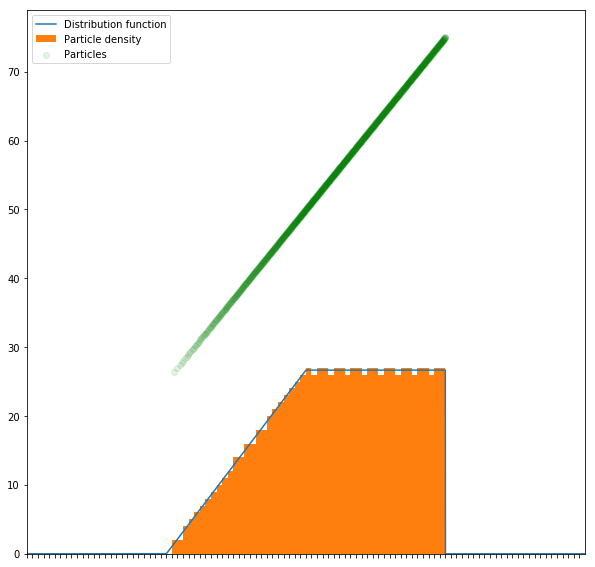

In [29]:
s = Species(1, 1, N)
s.x = dense_x[0:][indices]

plt.figure(figsize=(10,10))
plt.plot(dense_x, y, label="Distribution function")
plt.scatter(s.x, s.x, c="g", alpha=0.1, label="Particles")
plt.xlim(0, g.L)
plt.hist(s.x, g.x, label="Particle density");
plt.xticks(g.x)
# plt.grid()
plt.gca().xaxis.set_ticklabels([])
plt.legend()

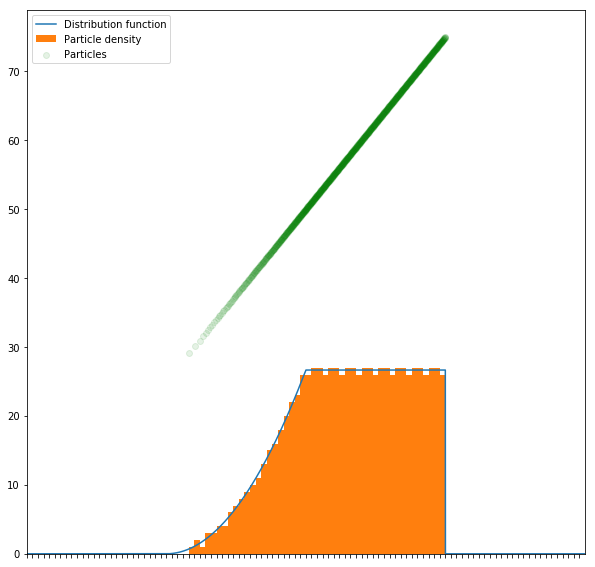

In [30]:
plt.figure(figsize=(10,10))
quadratic_distribution_function = density_profiles.FDENS(dense_x, moat_left, ramp_length, plasma_length, N, 'quadratic')
plt.plot(dense_x, quadratic_distribution_function, label="Distribution function")
s.distribute_nonuniformly(g.L, moat_left, ramp_length, plasma_length, profile='quadratic')
plt.scatter(s.x, s.x, c="g", alpha=0.1, label="Particles")
plt.xlim(0, g.L)
plt.hist(s.x, g.x, label="Particle density");
plt.xticks(g.x)
plt.gca().xaxis.set_ticklabels([])
plt.legend()

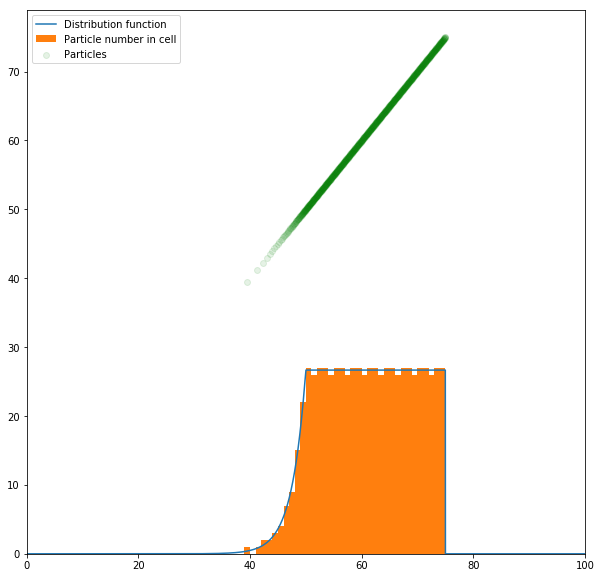

In [23]:
plt.figure(figsize=(10,10))
s = Species(1, 1, N)
exponential_distribution_function = density_profiles.FDENS(dense_x, moat_left, ramp_length, plasma_length, N, 'exponential')
plt.plot(dense_x, exponential_distribution_function, label="Distribution function")
s.distribute_nonuniformly(g.L, moat_left, ramp_length, plasma_length, profile='exponential')
plt.scatter(s.x, s.x, c="g", alpha=0.1, label="Particles")
plt.xlim(0, g.L)
plt.hist(s.x, g.x, label="Particle number in cell");
plt.xticks(g.x)
plt.gca().xaxis.set_ticklabels([])
plt.legend()

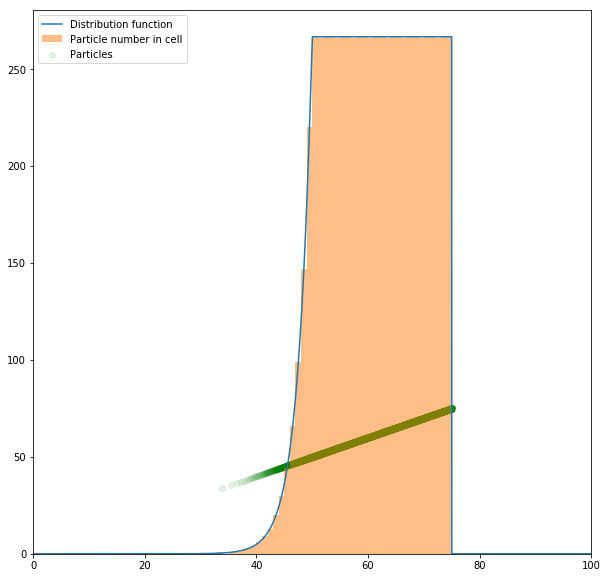

In [26]:
plt.figure(figsize=(10,10))
s = Species(1, 1, N * 10)
exponential2_distribution_function = density_profiles.FDENS(dense_x, moat_left, ramp_length, plasma_length, N*10, 'exponential')
plt.plot(dense_x, exponential2_distribution_function, label="Distribution function")
s.distribute_nonuniformly(g.L, moat_left, ramp_length, plasma_length, profile='exponential')
plt.xlim(0, g.L)
plt.hist(s.x, g.x, label="Particle number in cell", alpha=0.5);
plt.scatter(s.x, s.x, c="g", alpha=0.1, label="Particles")
plt.xticks(g.x)
plt.gca().xaxis.set_ticklabels([])
plt.legend()